# Impoerting required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Get the Raw data frame

In [2]:
df = pd.read_csv('AnomalyClean.csv')

In [3]:
df.head()


Unnamed: 0             Interval  ...  TemperatureMin  TemperatureMax
0           0  2021-11-01 06:00:00  ...       41.890411       63.643836
1           1  2021-11-01 10:00:00  ...       41.890411       63.643836
2           2  2021-11-01 14:00:00  ...       41.890411       63.643836
3           3  2021-11-01 18:00:00  ...       41.890411       63.643836
4           4  2021-11-01 22:00:00  ...       41.890411       63.643836

[5 rows x 14 columns]

In [4]:
df.shape

(771, 14)

Covert Intervals into dateTime stamps

In [5]:
df['Interval'] = pd.to_datetime(df['Interval'])
df.dtypes

Unnamed: 0                      int64
Interval               datetime64[ns]
DynamicViscosityAvg           float64
DynamicViscosityMin           float64
DynamicViscosityMax           float64
DielectricConstAvg            float64
DielectricConstMin            float64
DielectricConstMax            float64
DensityAvg                    float64
DensityMin                    float64
DensityMax                    float64
TemperatureAvg                float64
TemperatureMin                float64
TemperatureMax                float64
dtype: object

# Isolate Density Data and Visualize

In [6]:
df_Dens = df[['Interval', 'DensityAvg']]
df_Dens.head(3)

Interval  DensityAvg
0 2021-11-01 06:00:00  129.307523
1 2021-11-01 10:00:00  129.307523
2 2021-11-01 14:00:00  129.307523

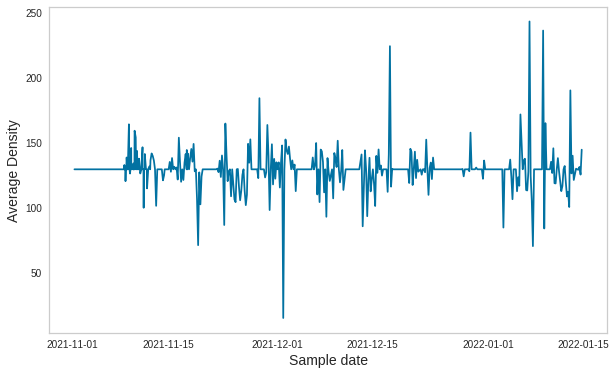

In [53]:
plt.figure(1, figsize = (10, 6))
plt.plot(df_Dens['Interval'], df_Dens['DensityAvg'])
plt.xlabel('Sample date', fontsize=14)
plt.ylabel('Average Density', fontsize=14)
plt.grid(False)

# Building the anomaly Detector

In [8]:
#!pip install pycaret


In [9]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 7% are taken out from original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split. This particular split is performed to simulate real life scenario. Another way to think about this is that these 54 samples are not available at the time when this experiment was performed.

In [10]:
data = df_Dens.sample(frac=0.7, random_state=600)
data_unseen = df_Dens.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (540, 2)
Unseen Data For Predictions: (231, 2)


# Setting up Environment in PyCaret

In [11]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   ignore_features = ['Interval'],
                   session_id = 246)

Description                 Value
0                               session_id                   246
1                            Original Data              (540, 2)
2                           Missing Values                 False
3                         Numeric Features                     1
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data              (540, 1)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  47d9
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

# Create a Model

In [12]:
#models()

In [13]:
iforest = create_model('iforest')

In [14]:
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=246, verbose=0)


In [15]:
#svm = create_model('svm', fraction = 0.025)

In [16]:
#print(svm)

# Assign a Model

In [17]:
iforest_results = assign_model(iforest)
iforest_results.head()

Interval  DensityAvg  Anomaly  Anomaly_Score
0 2021-11-25 14:00:00  105.500000        0      -0.001171
1 2022-01-07 18:00:00  129.307523        0      -0.278552
2 2021-11-11 11:43:00  129.307523        0      -0.278552
3 2021-11-09 21:01:00  129.307523        0      -0.278552
4 2021-11-17 17:12:00  129.307523        0      -0.278552

# Plot a Model

T-distributed Stochastic Neighbor Embedding (t-SNE)

In [18]:
#plot_model(iforest)


Uniform Manifold Approximation and Projection

In [19]:
#plot_model(iforest, plot='umap')


In [20]:
#iforest_results
iforest_results['Anomaly']

0      0
1      0
2      0
3      0
4      0
      ..
535    0
536    0
537    1
538    0
539    0
Name: Anomaly, Length: 540, dtype: int64

In [21]:
Nomal_dfDens =iforest_results[iforest_results['Anomaly'] == 0]
Nomal_dfDens.Anomaly.sum()

0

In [22]:
Anomal_dfDens =iforest_results[iforest_results['Anomaly'] == 1]
Anomal_dfDens.Anomaly.sum()

27

In [51]:
plt.scatter(Nomal_dfDens['Interval'], Nomal_dfDens['DensityAvg'], label = 'Normal Density')
plt.scatter(Anomal_dfDens['Interval'], Anomal_dfDens['DensityAvg'], label = 'Anomal Density')
plt.xlabel('Sample date', fontsize=14)
plt.ylabel('Average Density', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.grid(False)

# Predict on Unseen Data

In [24]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()

Interval  DensityAvg  Anomaly  Anomaly_Score
0 2021-11-02 06:00:00  129.307523        0      -0.278552
1 2021-11-02 10:00:00  129.307523        0      -0.278552
2 2021-11-02 14:00:00  129.307523        0      -0.278552
3 2021-11-03 02:00:00  129.307523        0      -0.278552
4 2021-11-04 06:00:00  129.307523        0      -0.278552

Label column indicates the outlier (1 = outlier, 0 = inlier). Score is the values computed by the algorithm. Outliers are assigned with larger anomaly scores. You can also use predict_model() function to label the training data.

In [25]:
data_predictions = predict_model(iforest, data = data)
data_predictions.head()

Interval  DensityAvg  Anomaly  Anomaly_Score
0 2021-11-25 14:00:00  105.500000        0      -0.001171
1 2022-01-07 18:00:00  129.307523        0      -0.278552
2 2021-11-11 11:43:00  129.307523        0      -0.278552
3 2021-11-09 21:01:00  129.307523        0      -0.278552
4 2021-11-17 17:12:00  129.307523        0      -0.278552

In [26]:
unseen_predictions.shape

(231, 4)

# Isolate Dielectric Data and Visualize

In [27]:
df_Die = df[['Interval', 'DielectricConstAvg']]
df_Die.head(3)

Interval  DielectricConstAvg
0 2021-11-01 06:00:00          118.060069
1 2021-11-01 10:00:00          118.060069
2 2021-11-01 14:00:00          118.060069

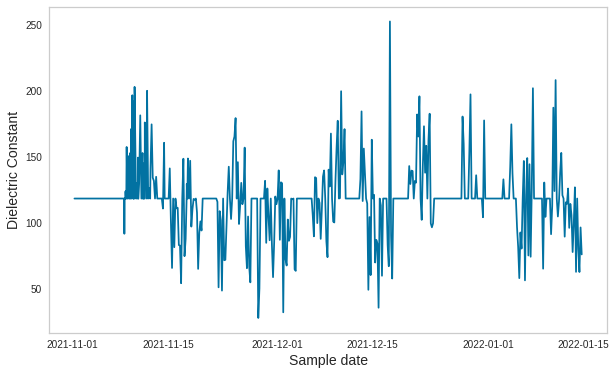

In [50]:
plt.figure(2, figsize = (10, 6))
plt.plot(df_Die['Interval'], df_Die['DielectricConstAvg'])
plt.xlabel('Sample date', fontsize=14)
plt.ylabel('Dielectric Constant', fontsize=14)
plt.grid(False)

# Building the anomaly Detector

In [29]:
#!pip install pycaret


In [30]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 7% are taken out from original dataset to be used for predictions at the end of experiment. This should not be confused with train/test split. This particular split is performed to simulate real life scenario. Another way to think about this is that these 54 samples are not available at the time when this experiment was performed.

In [31]:
data = df_Die.sample(frac=0.7, random_state=800)
data_unseen = df_Die.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (540, 2)
Unseen Data For Predictions: (231, 2)


# Setting up Environment in PyCaret

In [32]:
from pycaret.anomaly import *

exp_ano101 = setup(data, normalize = True, 
                   ignore_features = ['Interval'],
                   session_id = 221)

Description                 Value
0                               session_id                   221
1                            Original Data              (540, 2)
2                           Missing Values                 False
3                         Numeric Features                     1
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data              (540, 1)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  ddc8
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

# Create a Model

In [33]:
#models()

In [34]:
iforest = create_model('iforest')

In [35]:
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=221, verbose=0)


In [36]:
#svm = create_model('svm', fraction = 0.025)

In [37]:
#print(svm)

# Assign a Model

In [38]:
iforest_results = assign_model(iforest)
iforest_results.head()

Interval  DielectricConstAvg  Anomaly  Anomaly_Score
0 2021-12-19 14:00:00          118.060069        0      -0.311144
1 2021-12-08 22:00:00          167.205128        1       0.011511
2 2022-01-10 02:00:00          118.060069        0      -0.311144
3 2021-11-08 14:24:00          118.060069        0      -0.311144
4 2021-11-11 13:37:00          118.060069        0      -0.311144

# Plot a Model

T-distributed Stochastic Neighbor Embedding (t-SNE)

In [39]:
#plot_model(iforest)


Uniform Manifold Approximation and Projection

In [40]:
#plot_model(iforest, plot='umap')


In [41]:
#iforest_results
iforest_results['Anomaly']

0      0
1      1
2      0
3      0
4      0
      ..
535    0
536    0
537    0
538    0
539    0
Name: Anomaly, Length: 540, dtype: int64

In [42]:
Nomal_dfDie =iforest_results[iforest_results['Anomaly'] == 0]
Nomal_dfDie.Anomaly.sum()

0

In [43]:
Anomal_dfDie =iforest_results[iforest_results['Anomaly'] == 1]
Anomal_dfDie.Anomaly.sum()

26

In [49]:
plt.scatter(Nomal_dfDie['Interval'], Nomal_dfDie['DielectricConstAvg'], label = 'Normal Dielectric Constant')
plt.scatter(Anomal_dfDie['Interval'], Anomal_dfDie['DielectricConstAvg'], label = 'Anomal Dielectric Constant')
plt.xlabel('Sample date', fontsize=14)
plt.ylabel('Dielectric Constant', fontsize=14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.grid(False)


# Predict on Unseen Data

In [45]:
unseen_predictions = predict_model(iforest, data=data_unseen)
unseen_predictions.head()

Interval  DielectricConstAvg  Anomaly  Anomaly_Score
0 2021-11-02 14:00:00          118.060069        0      -0.311144
1 2021-11-03 18:00:00          118.060069        0      -0.311144
2 2021-11-03 22:00:00          118.060069        0      -0.311144
3 2021-11-04 02:00:00          118.060069        0      -0.311144
4 2021-11-04 22:00:00          118.060069        0      -0.311144

Label column indicates the outlier (1 = outlier, 0 = inlier). Score is the values computed by the algorithm. Outliers are assigned with larger anomaly scores. You can also use predict_model() function to label the training data.

In [46]:
data_predictions = predict_model(iforest, data = data)
data_predictions.head()

Interval  DielectricConstAvg  Anomaly  Anomaly_Score
0 2021-12-19 14:00:00          118.060069        0      -0.311144
1 2021-12-08 22:00:00          167.205128        1       0.011511
2 2022-01-10 02:00:00          118.060069        0      -0.311144
3 2021-11-08 14:24:00          118.060069        0      -0.311144
4 2021-11-11 13:37:00          118.060069        0      -0.311144

In [47]:
unseen_predictions.shape

(231, 4)